# 📘 IEEE Journal Club – Tutorial Session
## 🔬 Reproducing Figures from Scientific Papers

### 🧬 Focus: Single-Cell & Spatial Transcriptomics
**Paper Title**: *A single-cell and spatially resolved atlas of human breast cancers*  
**DOI**: [https://doi.org/10.1038/s41588-021-00911-1](https://doi.org/10.1038/s41588-021-00911-1)

### 👨‍🏫 Session 1: Reproducing **Figure 1** of the Paper

In [ ]:
# 📁 Set up project directory structure
dir.create('atlas_data')
setwd('atlas_data')
getwd()
dir.create('filtered_count_matrix')

## ⬇️ Step 1: Download the Dataset
We will download the raw count matrix and metadata files from the **Single Cell Portal**, using the accession **SCP1039**.

The files we will download are:
- `features.tsv.gz` — Gene information
- `matrix.mtx.gz` — Sparse gene expression matrix
- `barcodes.tsv.gz` — Cell barcodes
- `Whole_miniatlas_meta.csv` — Metadata
- `Whole_miniatlas_umap.coords.tsv` — Precomputed UMAP coordinates

In [ ]:
# 🔹 Download the gene features file
url="https://storage.googleapis.com/fc-be23c75e-93fc-4294-b8ae-0ea1c93661c3/features.tsv.gz?GoogleAccessId=116798894341-compute%40developer.gserviceaccount.com&Expires=1746469539&Signature=AXvSnGe%2Fh5eD4TQ3eHhUhY9hyQirM5t3Iq7Pp8rercYM5EjJD8zUWErH9B69xY%2FSRzDW9EcJFRK2%2F%2Btz6MnP1Q5bQLlz1mg%2FXGF1KDZBl3WD8oupinBbQzwVioDiJ53nS5O4JOf%2FCJZ1uE1jvbfAfimrs%2FUgN9aG0h%2B1IoqzyUDxbf6ZDQp%2BQ2QS96%2B85GMGNyUSXXdLp7SXVI2dJdktoTEeE7l9CKW4XJxROGWQULQIhmAKGnFFktvd3Y0yl3jmvI5VKkuJyqM4l70a%2Bihu%2BzLGIFyWDKWveekzLzx2RHZKm4J9hiK1rqhYNDOcCPTF8SuulnhFyDHySI8QLHtLCg%3D%3D"
output="filtered_count_matrix/features.tsv.gz"
download.file(url = url, destfile = output)

In [ ]:
# 🔹 Download the expression matrix file
url="https://storage.googleapis.com/fc-be23c75e-93fc-4294-b8ae-0ea1c93661c3/matrix.mtx.gz?GoogleAccessId=116798894341-compute%40developer.gserviceaccount.com&Expires=1746469539&Signature=ESoOziKNEkswYhL505qPgKwtvn38bgs3vM9bSqvrbPgADQRv7TY0gzy9awVOt8Qy33LkmJPon6B6LtEyvk9VILsDYcgmcwzF081XgolBRkjLOj7m3j8ThzXWyaywcvkc%2FqjKfbIVwJCj5lT2MEpJvfJkfiz2mEPw4o6UcAPr%2FnRfi2BVa8ANy6sKGY%2F843UuQzEAqOZbmeDsYMHsP23crh4OphTPd1kdqayTSUaa8H2lv%2BhCVfAkwlHrItf0fed8BZJGs79nNZk7IGffPP448Rgd9F%2FfWsNk4wZC2CguXjioUFz8hm5f7CbpCLm1dlUnaF3k8%2FFUO22%2FEq8xPqOwkw%3D%3D"
output="filtered_count_matrix/matrix.mtx.gz"
download.file(url = url, destfile = output)

In [ ]:
# 🔹 Download the cell barcodes file
url="https://storage.googleapis.com/fc-be23c75e-93fc-4294-b8ae-0ea1c93661c3/barcodes.tsv.gz?GoogleAccessId=116798894341-compute%40developer.gserviceaccount.com&Expires=1746469538&Signature=DlL5is5cPpaXE9FexXOJaohXUV0jOeBFsXU8OKW%2BjUgg2JUcEnJvXnsGTwrfkQlkao1TZxaRm1JHaaVdc9FPJVplKPJtCNtA3s3R3CA%2FOTpQ2s9%2F2T86IOB3poHFIaGkU%2BKT0DRn7yrOSDJ%2BLt1IUw6w2yoW3N0Z33gRI8YJ2kkAohZsK5l7xcp7%2FFFi4t0hgU9s3DCBBmR47OBo7dft%2FYxMJrZqMB%2FXqrWlPw33PCd9b5BVRG8PdygyfgdMBFvnNA3JLpkQ%2FeBLrA%2BLoluU%2B0Jupta3w3v44MPP6W4Hkv4s0u0%2BjKU2bgYGcyLlJX48Q0sUrfuoR65Gjux%2F%2F9pUTw%3D%3D"
output="filtered_count_matrix/barcodes.tsv.gz"
download.file(url = url, destfile = output)

In [ ]:
# 🔹 Download the metadata file
url="https://storage.googleapis.com/fc-be23c75e-93fc-4294-b8ae-0ea1c93661c3/Whole_miniatlas_meta.csv?GoogleAccessId=116798894341-compute%40developer.gserviceaccount.com&Expires=1746469539&Signature=T0HeA%2BfvgTE1L7GlN58pkNr8p1dfRUiV%2FNKkG7GTMV5XdpmQh2sfP3LaUllwGgImFqMx2fORne4Ropa17XnDGMdlFGtfPIANAkvhEVsV26MnEx1mknBruPM7RBepd5vXUdxrOoc%2Bb9OQOYlxMFvkCxWV46GzpGpr%2BCsoB4nRmFspwyHU2r5ly0azkbYMZIM2R3F1DLrgu17qh7A1LOfejg8To5QZqaXq3bzZvSKNk2IycnjkkAgSoMrm7LZLZsD%2B3CoOIR3cysurR2CFMsq74KGqJWbuzX2E%2BC6eccl3qvZwXEZ1ApwmYOyTVBT2HUeuo1bYivUmZSaCpd10SoeYVg%3D%3D"
output="Whole_miniatlas_meta.csv"
download.file(url = url, destfile = output)

In [ ]:
# 🔹 Download the UMAP coordinates file
url="https://storage.googleapis.com/fc-be23c75e-93fc-4294-b8ae-0ea1c93661c3/Whole_miniatlas_umap.coords.tsv?GoogleAccessId=116798894341-compute%40developer.gserviceaccount.com&Expires=1746469539&Signature=OZMHiwUsR02d1SBwlW2wcROFXKnCGRKatZL%2BNl1HbSZfTPXHzMwDHR90Z2G4lHglGwlAT2bbO4JrGFedEW59ARA7tm4nj8lkF1L6lLFQGrgzeeK6sji5ROZ..."
output="Whole_miniatlas_umap.coords.tsv"
download.file(url = url, destfile = output)

## ⬇️ Step 2: Creating Seurat Object
we will create seurat_obj and add the meta and dimention data

In [135]:
# loading packages
library(Seurat)
library(dplyr)

In [ ]:
# reading count data and making seurat object 
seurat_obj <- Read10X('filtered_count_matrix') %>% CreateSeuratObject()

In [ ]:
seurat_obj[["RNA"]]$data <- seurat_obj[["RNA"]]$counts

In [136]:
# loading up meta data 
meta <- read.csv("Whole_miniatlas_meta.csv", row.names = 1)
head(meta)

,Patient,Percent_mito,nCount_RNA,nFeature_RNA,celltype_major,celltype_minor,celltype_subset,subtype,gene_module,Calls,normal_cell_call,CNA_value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TYPE,group,numeric,numeric,numeric,group,group,group,group,group,group,group,group
CID3586_AAGACCTCAGCATGAG,CID3586,1.506221349,4581,1689,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_AAGGTTCGTAGTACCT,CID3586,5.793742758,1726,779,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_ACCAGTAGTTGTGGCC,CID3586,1.383238405,1229,514,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_ACCCACTAGATGTCGG,CID3586,1.923076923,1352,609,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value
CID3586_ACTGATGGTCAACTGT,CID3586,13.32554062,1711,807,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,no_scTYPER_call,no_inferCNV_call,no_CNA_value


In [137]:
# Ensure order and number of cells match
meta <- meta[colnames(seurat_obj), ]
# Add metadata to Seurat object
seurat_obj <- AddMetaData(seurat_obj, metadata = meta)

In [139]:
umap <- read.table("Whole_miniatlas_umap.coords.tsv", header = TRUE, row.names = 1)
head(umap)

,X,Y
,<chr>,<chr>
TYPE,numeric,numeric
CID3586_AAGACCTCAGCATGAG,-7.988275051,-8.241251945
CID3586_AAGGTTCGTAGTACCT,-7.112645149,-8.12227726
CID3586_ACCAGTAGTTGTGGCC,-7.50182724,-8.194179535
CID3586_ACCCACTAGATGTCGG,-7.879616737,-8.264145851
CID3586_ACTGATGGTCAACTGT,-6.750463009,-9.011130333


In [140]:
# convert all columns to numeric as they of type chr
umap[] <- lapply(umap, as.numeric) 
head(umap)

Warning message in lapply(umap, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(umap, as.numeric):
“NAs introduced by coercion”


,X,Y
,<dbl>,<dbl>
TYPE,NA,NA
CID3586_AAGACCTCAGCATGAG,-7.988275,-8.241252
CID3586_AAGGTTCGTAGTACCT,-7.112645,-8.122277
CID3586_ACCAGTAGTTGTGGCC,-7.501827,-8.194180
CID3586_ACCCACTAGATGTCGG,-7.879617,-8.264146
CID3586_ACTGATGGTCAACTGT,-6.750463,-9.011130


In [141]:
umap= umap[-1,] # removing the first row 

colnames(umap) = c( 'UMAP_1', 'UMAP_2')
# this code because seurat object expect the column names to be (UMAP_ + number of dimention)

In [142]:
# Make sure rownames match the Seurat object
umap <- umap[colnames(seurat_obj), ]

# Add as a dimensional reduction object
seurat_obj[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(umap), key = "UMAP_", assay = DefaultAssay(seurat_obj))

In [143]:
# editing notebook figure size 
# options(repr.plot.width = 15, repr.plot.height = 10) 
######### this code is used in notebook to make plots bigger

# 📊 **Figure 1A – UMAP Clustering by Cell Types**


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



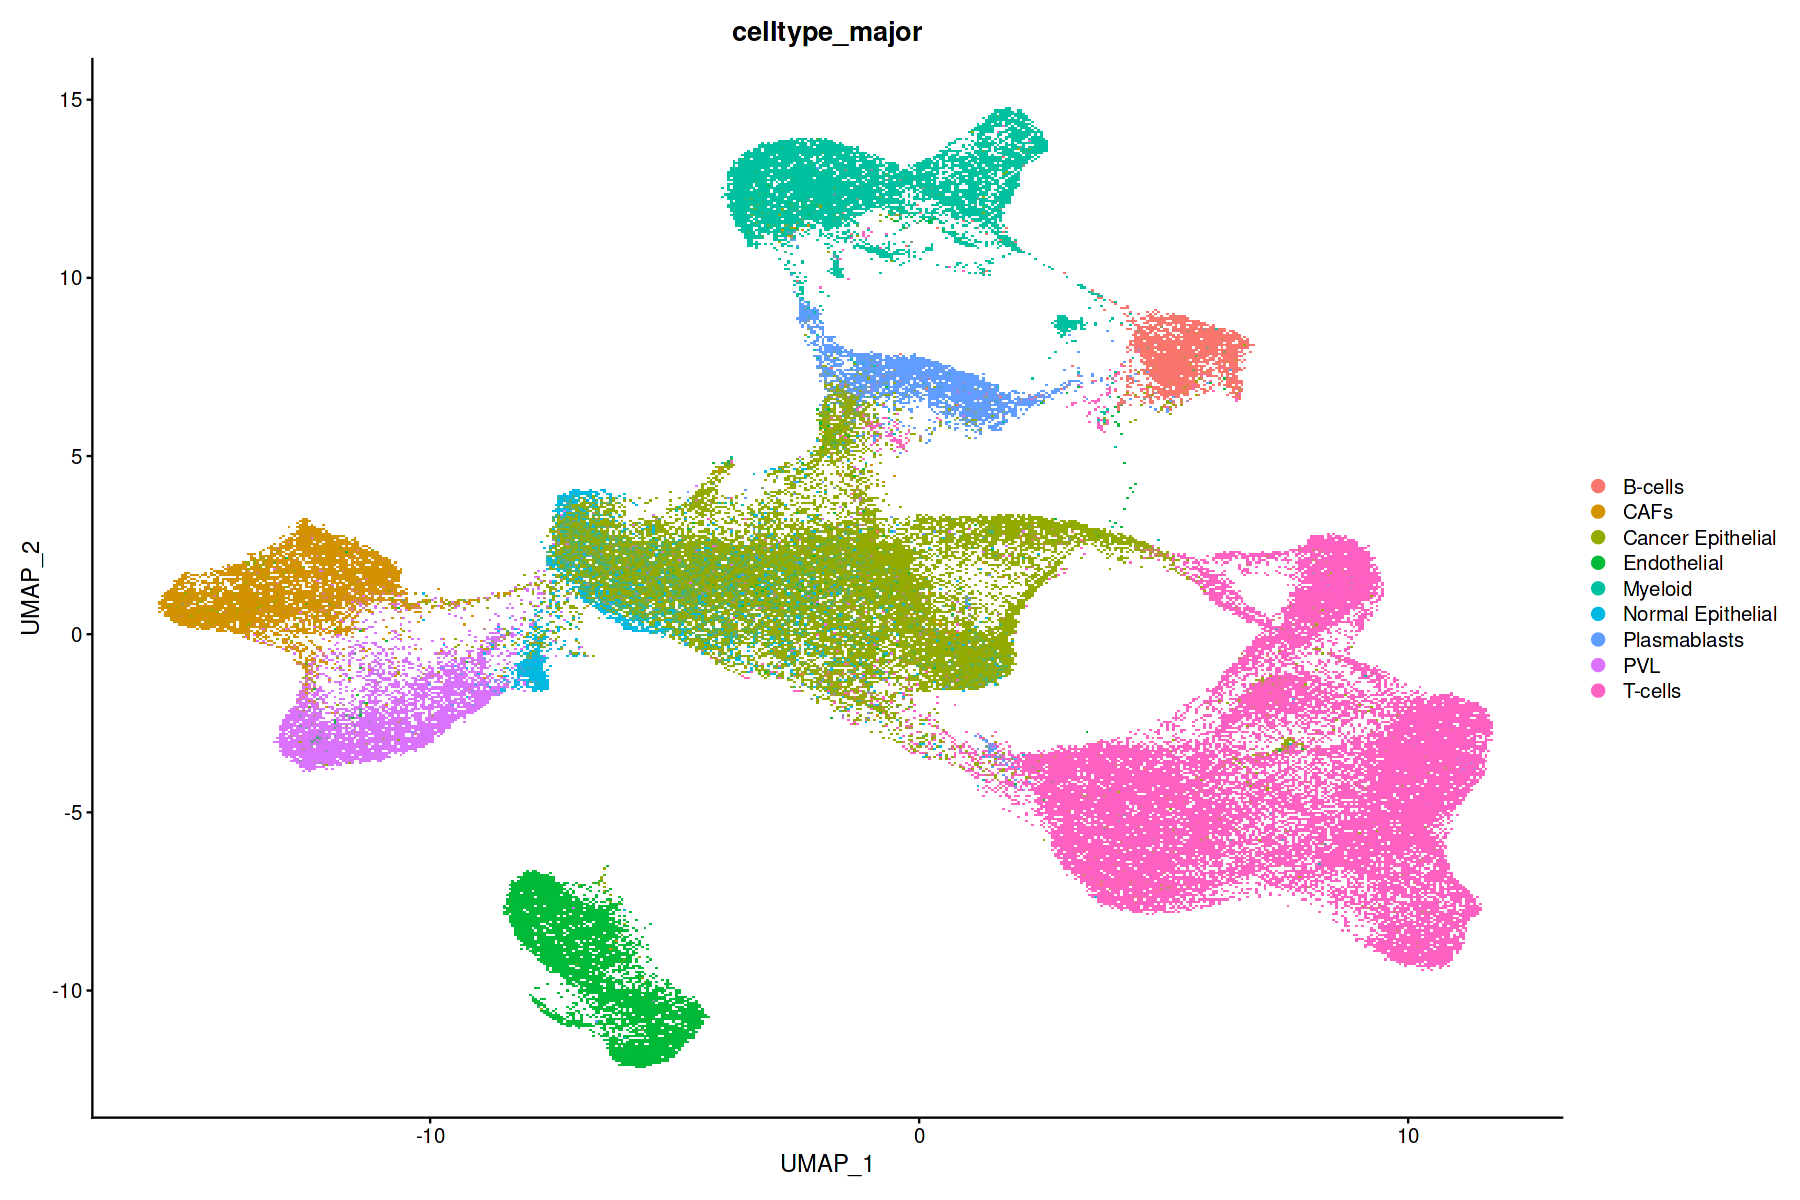

In [144]:
# Visualize UMAP colored by major cell types
DimPlot(seurat_obj, reduction = "umap", group.by= 'celltype_major')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



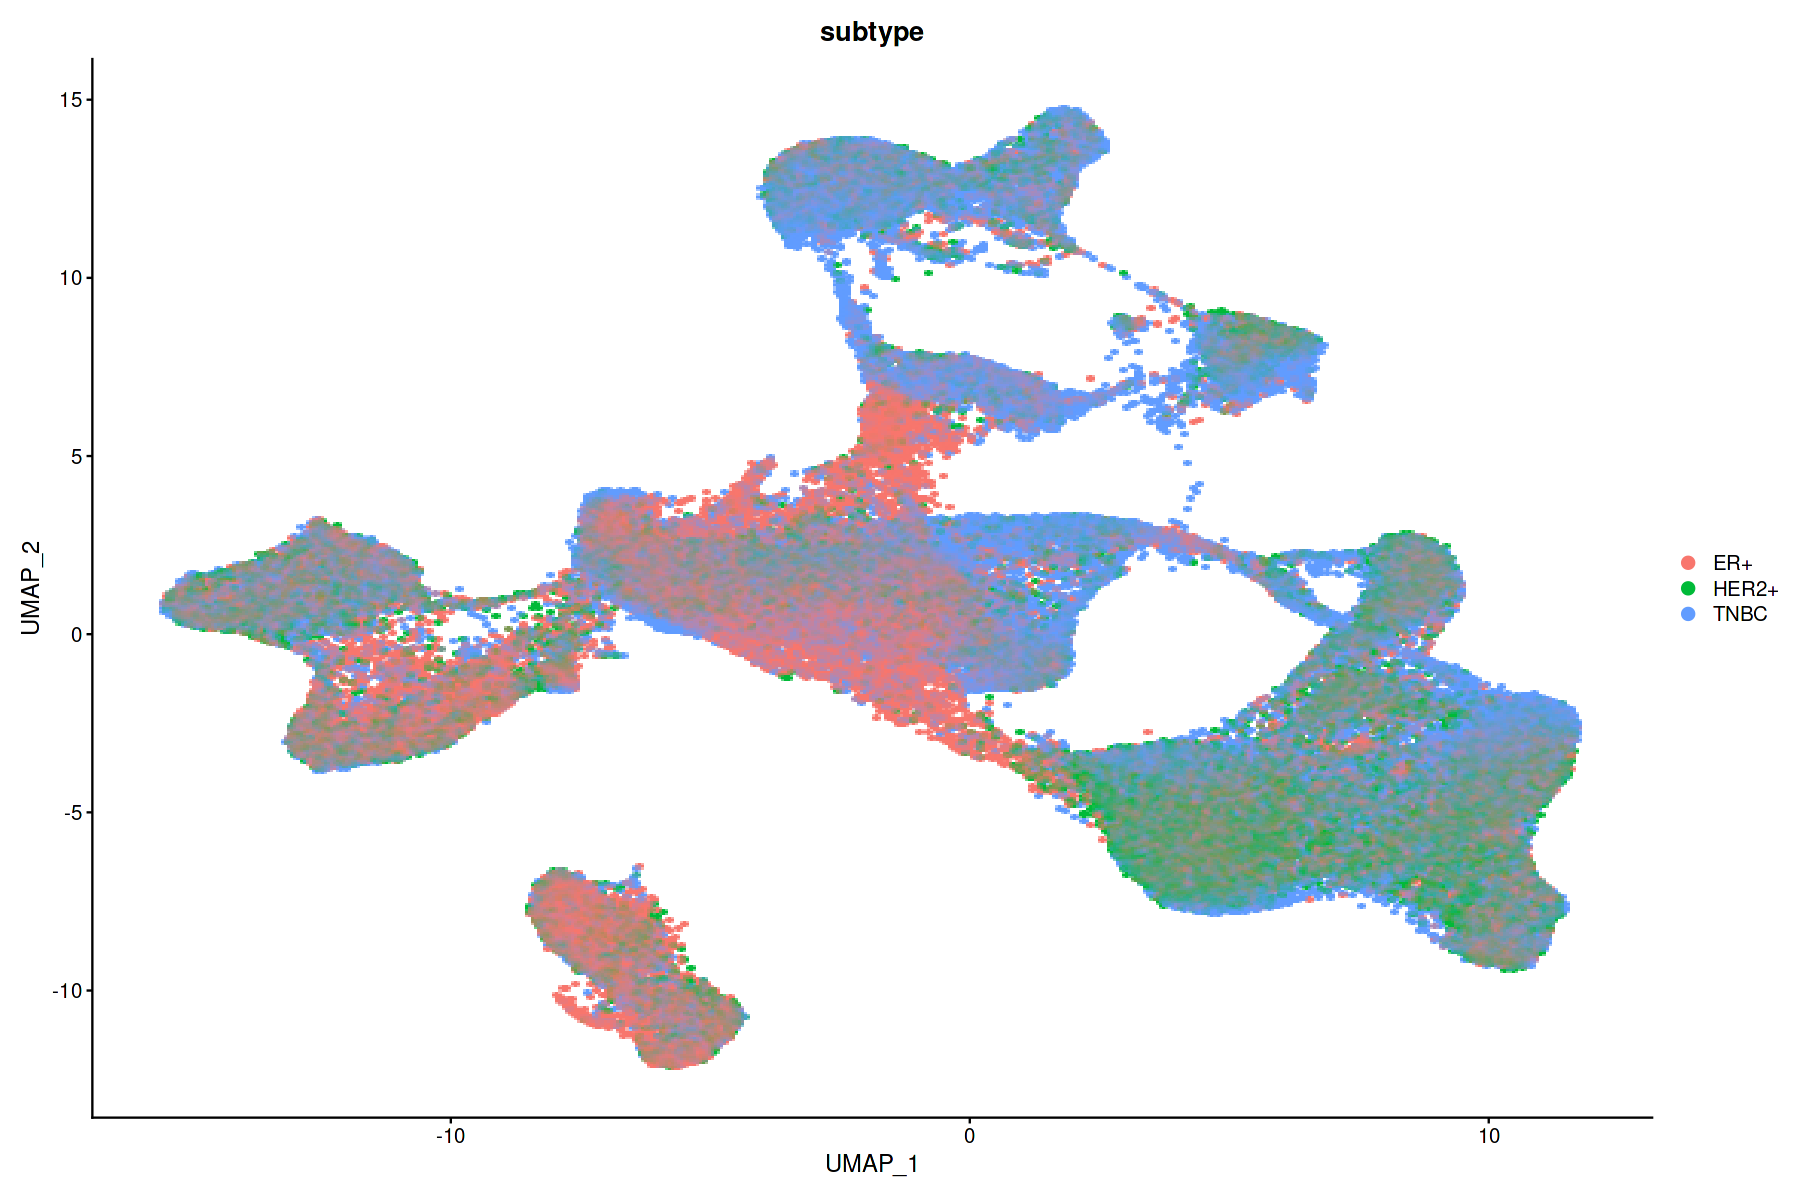

In [145]:
# Visualize UMAP colored by cell subtypes
DimPlot(seurat_obj, reduction='umap', group.by='subtype', pt.size =2)

# 🧬 **Figure 1B – FeaturePlot for Marker Genes**

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



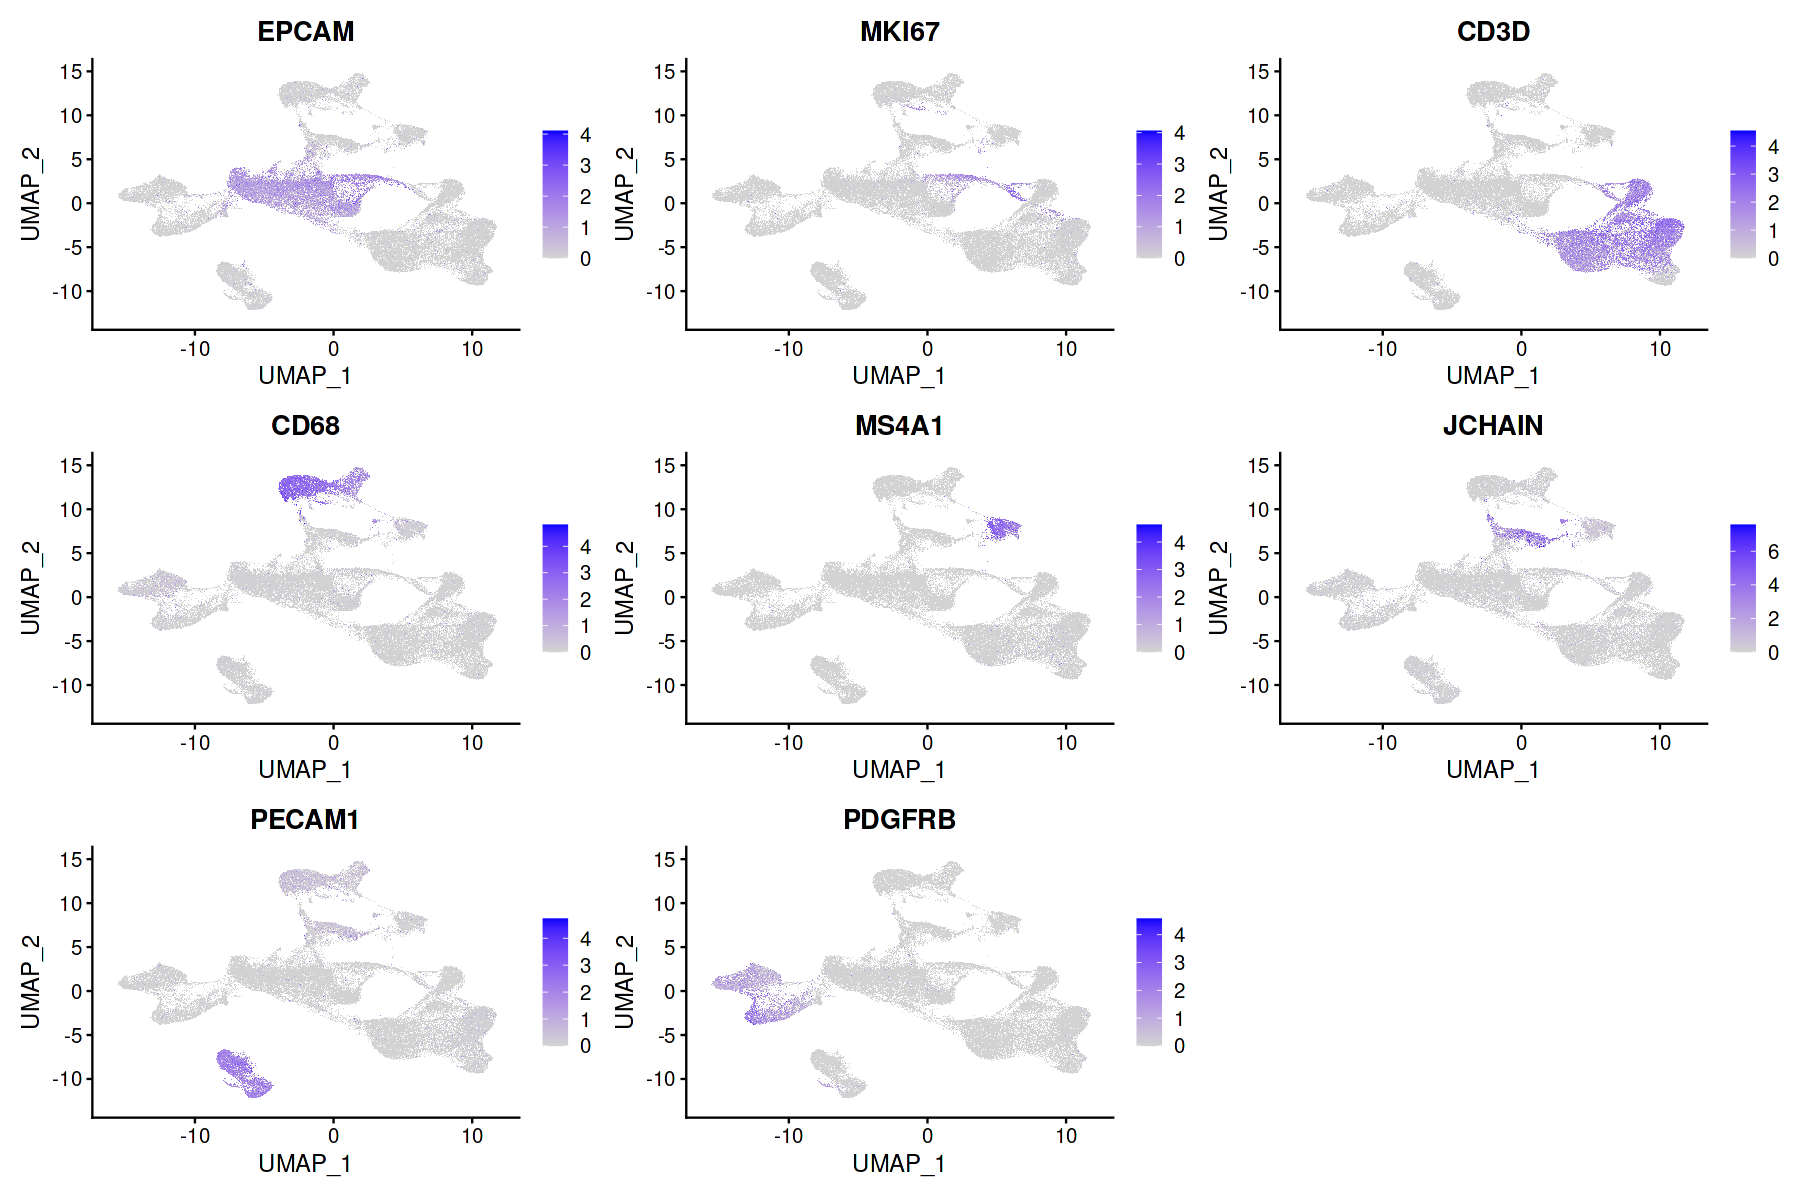

In [146]:
FeaturePlot(seurat_obj, reduction = "umap", features = c('EPCAM', 'MKI67','CD3D','CD68','MS4A1','JCHAIN','PECAM1','PDGFRB'), slot = "counts")

# 📊 **Figure 1C – Cell Type Proportions Per Patient**

In [147]:
# Calculate cell type proportions per patient
cell_prop <- meta %>%
  group_by(Patient, celltype_major, subtype) %>%
  summarise(count = n()) %>%
  group_by(Patient) %>%
  mutate(prop = count / sum(count)) %>%
  ungroup()

`summarise()` has grouped output by 'Patient', 'celltype_major'. You can
override using the `.groups` argument.


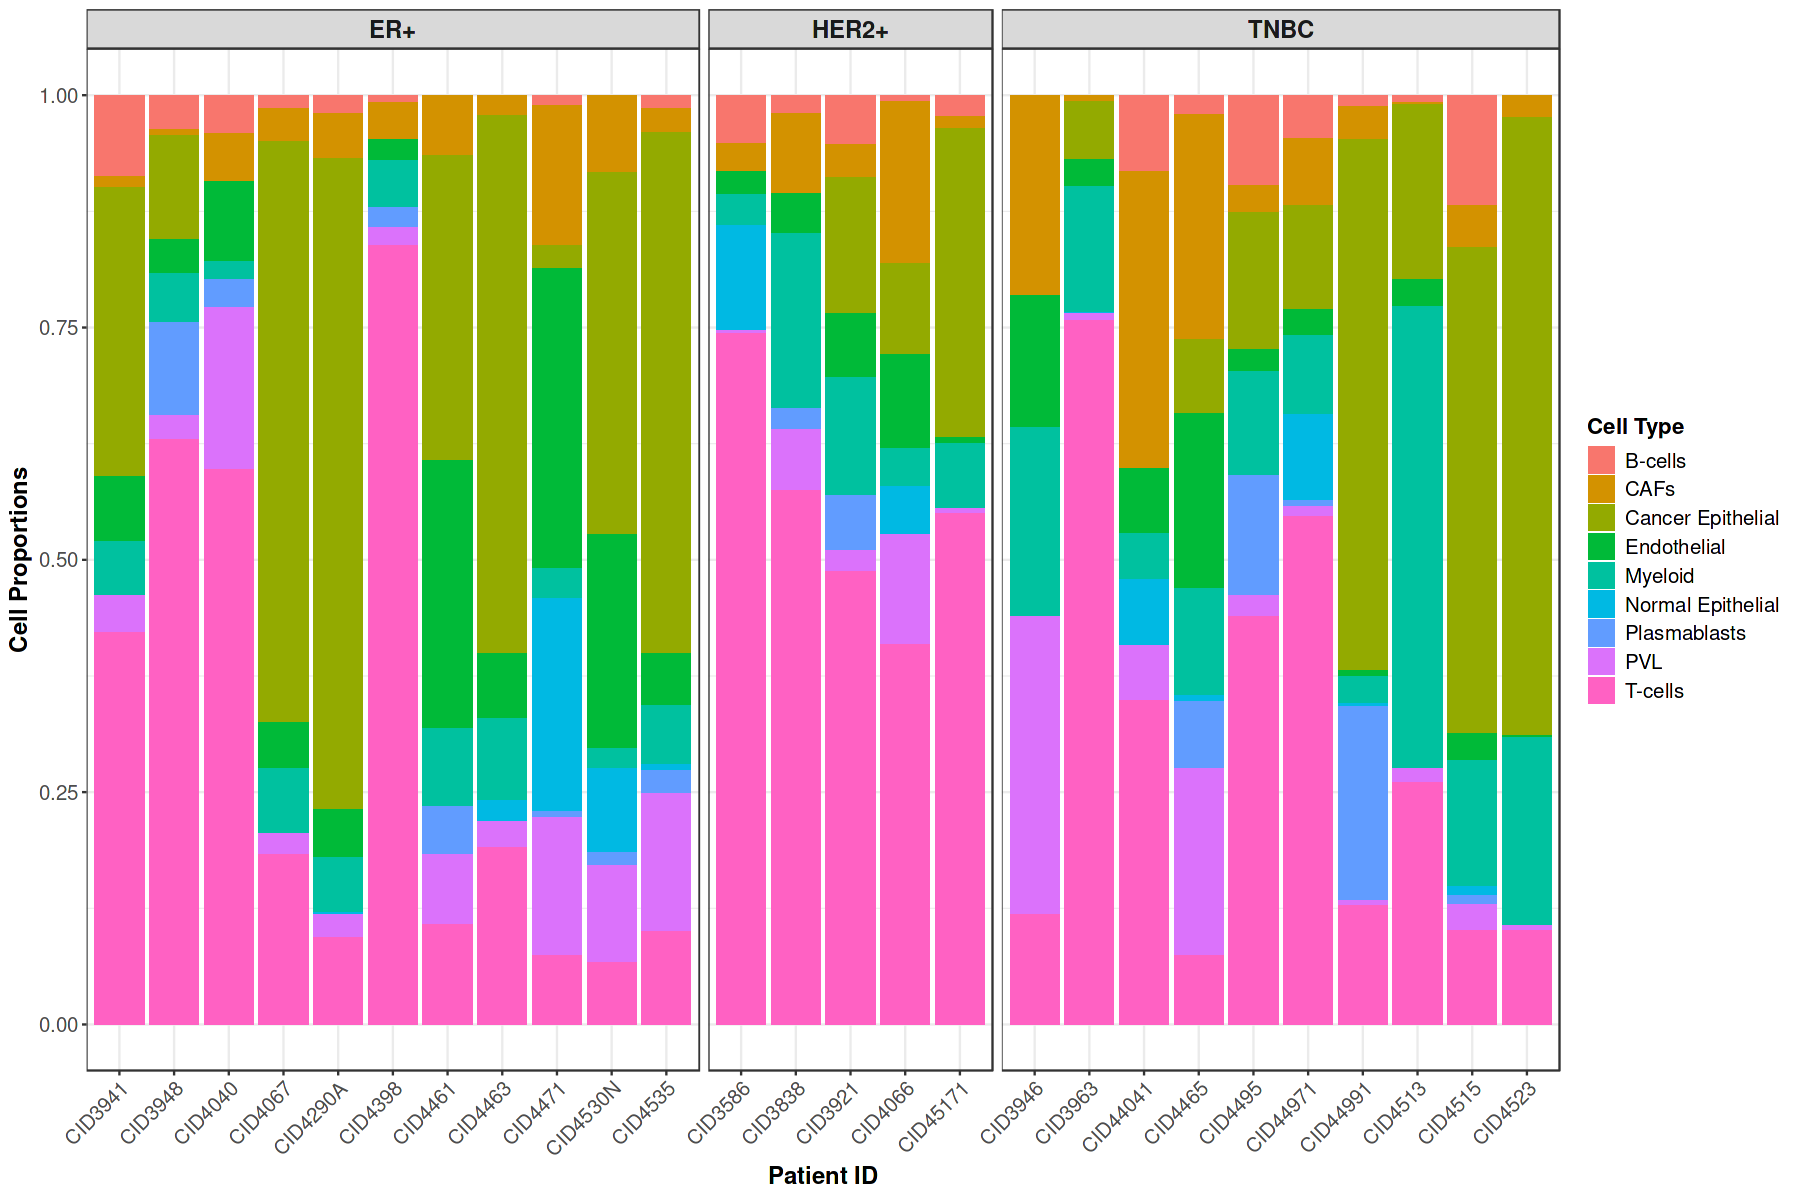

In [148]:
# Plot
ggplot(cell_prop, aes(x = Patient, y = prop, fill = celltype_major)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ subtype, scales = "free_x", space = "free") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  
    axis.text.y = element_text(size = 12),                         
    axis.title.x = element_text(size = 14, face = "bold"),        
    axis.title.y = element_text(size = 14, face = "bold"),     
    strip.text = element_text(size = 14, face = "bold"),     
    legend.title = element_text(size = 13, face = "bold"),     
    legend.text = element_text(size = 12)                        
  ) +
  labs(x = "Patient ID", y = "Cell Proportions", fill = "Cell Type")

In [ ]:
# saving object
saveRDS(seurat_obj, 'seurat_obj.rds')